**Response Model** for the **HL** Category: High Vulnerability and Low Resilience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
# Read in data and define x and y
df = pd.read_csv('5_response_HL.csv')
y = df['res_mean']
x = df.drop(['NAME','Kmeans_t','resilience','res_w','res_un','res_mean','res_wei','res_unwei'], axis = 1)

,NAME,Kmeans_t,resilience,res_w,res_un,res_mean,res_wei,res_unwei,eduR,EnglishR,...,all_road,elec_1000,relig_1000,fac_1000,popinR,physicalR,mentalR,shelt_1000,hosp_1000,servi_1000
0,5007.0,HL,6.255156,5.397807,6.802858,6.100332,-0.680453,-0.673695,0.502871,-0.753208,...,1.227744,-0.20678,-0.251914,-0.340930,-0.159602,-0.153457,0.710575,-0.240700,-0.131793,-0.381052
1,5009.0,HL,6.468335,5.452433,7.147180,6.299806,-0.635178,-0.322617,0.720233,-0.620739,...,0.307190,-0.20678,-0.269423,-0.340930,-0.166426,0.584336,1.201196,-0.240700,-0.131793,-0.381052
2,5010.0,HL,6.524633,5.234193,6.911252,6.072723,-0.816061,-0.563174,0.018747,-1.297175,...,0.230764,-0.20678,0.106656,-0.340930,-0.321677,0.452587,1.061019,-0.240700,-0.131793,-0.381052
3,5011.0,HL,6.584090,5.498487,7.516753,6.507620,-0.597006,0.054207,0.641192,0.100793,...,0.029100,-0.20678,-0.340084,-0.340930,0.195258,0.584336,0.955886,-0.240700,-0.131793,1.535441
4,5012.0,HL,6.178402,4.580188,6.380117,5.480153,-1.358117,-1.104730,0.479818,-0.863128,...,-0.647387,-0.20678,0.307801,-0.340930,0.108249,0.663385,1.236241,-0.240700,-0.131793,-0.381052
5,5013.0,HL,6.503825,5.555938,7.251482,6.403710,-0.549390,-0.216269,-0.045473,-0.772937,...,-0.499467,-0.20678,0.329687,-0.340930,-0.089654,0.452587,0.955886,-0.240700,-0.131793,-0.381052
6,5016.0,HL,6.440797,4.972684,6.237263,5.604974,-1.032806,-1.250387,-0.411036,-0.975868,...,0.704108,-0.20678,0.007595,-0.340930,0.384631,0.004642,0.395175,-0.240700,4.531473,-0.381052
7,5019.0,HL,6.505708,5.643275,7.069579,6.356427,-0.477002,-0.401741,-0.119574,-0.181055,...,1.283954,-0.20678,-0.153269,-0.340930,0.483582,0.663385,1.166152,1.289744,-0.131793,-0.381052
8,5026.0,HL,6.378222,5.771253,7.500715,6.635984,-0.370931,0.037854,0.206469,0.030331,...,-0.375707,-0.20678,0.105510,-0.340930,0.120192,0.610686,0.850753,-0.240700,-0.131793,1.050204
9,5027.0,HL,6.246549,4.609239,6.257583,5.433411,-1.334039,-1.229668,0.848674,-0.350164,...,1.174000,-0.20678,0.819783,0.843617,0.087776,1.295779,1.061019,1.583656,-0.131793,-0.381052


1. Run the random forest response model

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_e

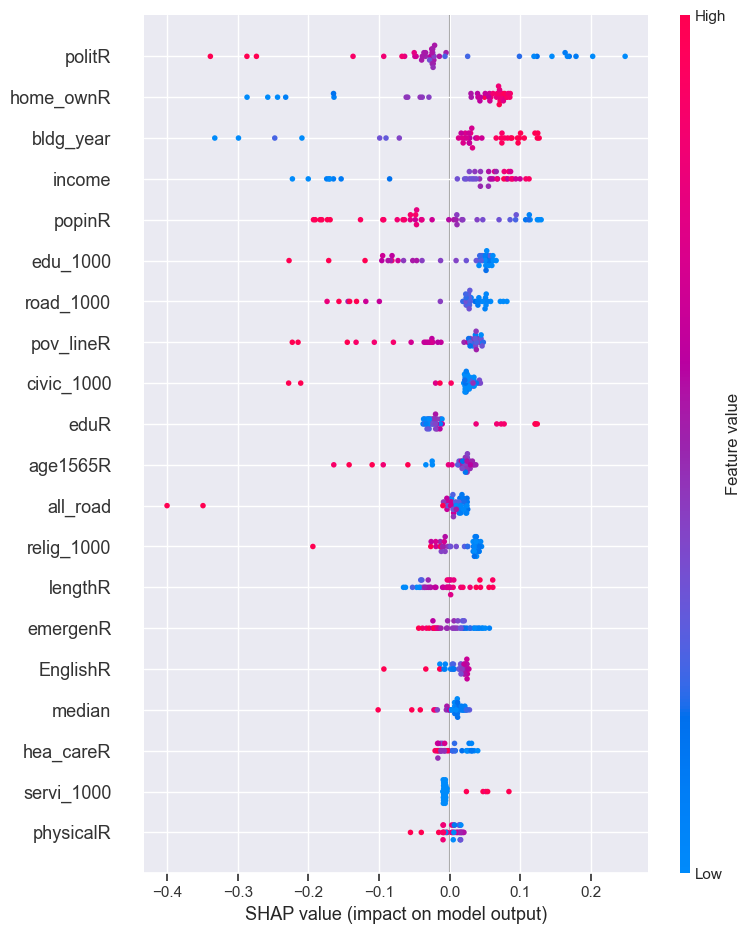

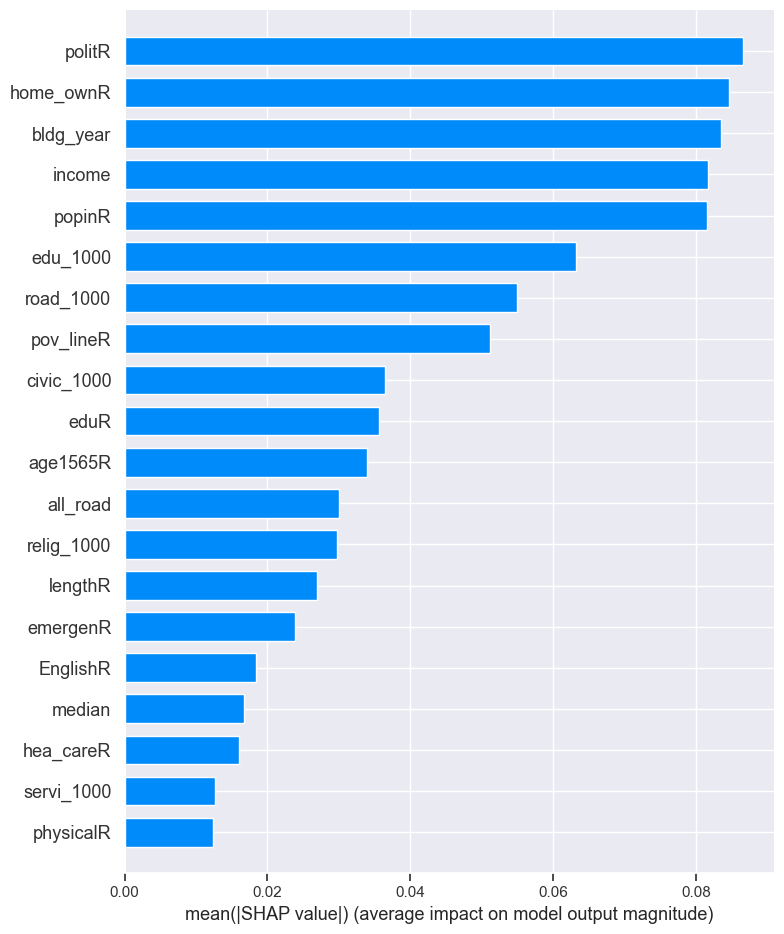

[0.5405]
[0.4731404915880185]
[0.37048005471069356]
[0.30018409212560954]
[0.7511364839947502]
{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}


In [13]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

2. Backward feature selection

In [17]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 30, 
    max_features = "sqrt", 
    n_estimators=200, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['EnglishR', 'age1565R', 'civic_1000', 'lengthR', 'pov_lineR', 'income',
       'home_ownR', 'emergenR', 'bldg_year', 'sport_1000', 'edu_1000',
       'nointerR', 'relig_1000', 'popinR', 'servi_1000'],
      dtype='object')


                 eduR  EnglishR  age1565R    politR  civic_1000   lengthR  \
eduR         1.000000  0.093509 -0.226410 -0.191340    0.148195  0.385832   
EnglishR     0.093509  1.000000  0.647025  0.200210    0.300699 -0.196801   
age1565R    -0.226410  0.647025  1.000000  0.070310    0.271768 -0.488801   
politR      -0.191340  0.200210  0.070310  1.000000    0.369871  0.077658   
civic_1000   0.148195  0.300699  0.271768  0.369871    1.000000 -0.070718   
lengthR      0.385832 -0.196801 -0.488801  0.077658   -0.070718  1.000000   
pov_lineR    0.105877 -0.240806 -0.287219 -0.108378   -0.036533  0.098745   
median      -0.187365  0.190989  0.248945  0.018834    0.312160 -0.369234   
hea_careR   -0.246264  0.008796  0.099665  0.005512   -0.005409 -0.107936   
income       0.066121 -0.071080 -0.069033 -0.111808   -0.134707  0.200975   
home_ownR    0.171032 -0.005853 -0.235600  0.157308   -0.204061  0.492327   
emergenR    -0.270843 -0.015283  0.240207  0.243333    0.294353 -0.145640   

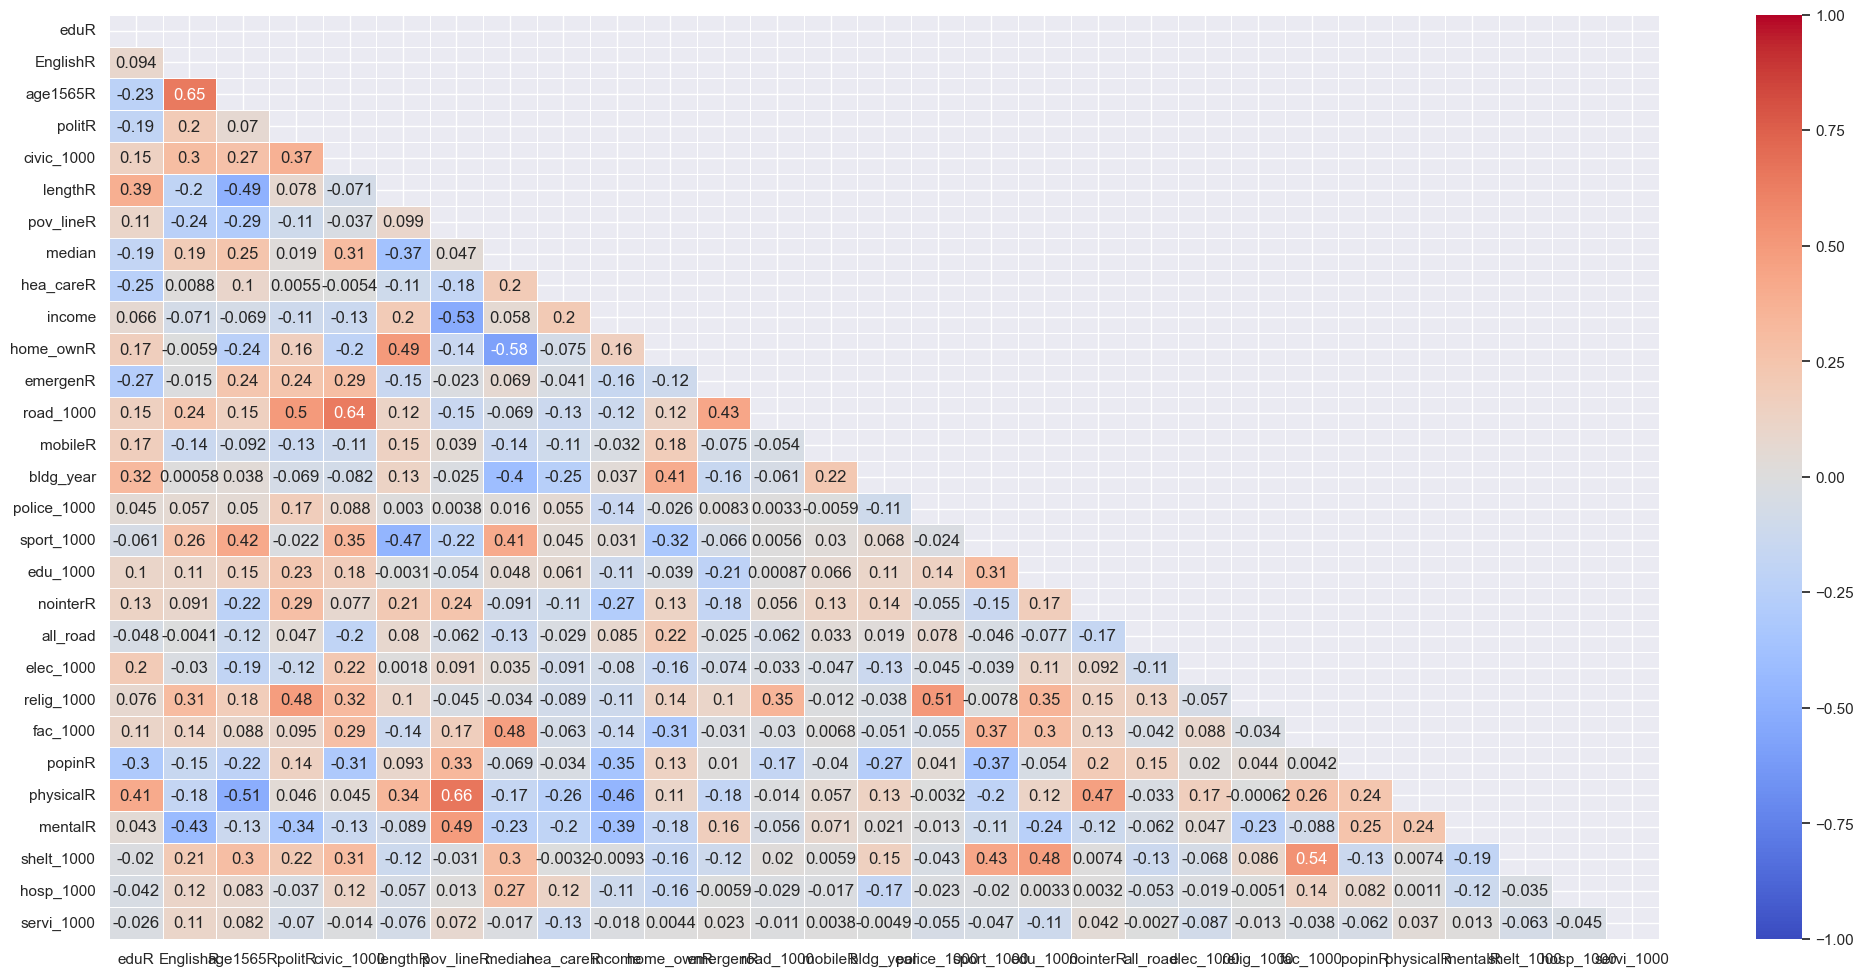

In [18]:
# Calculate the correlation matrix to analyze the relationships between features
correlation_matrix = x.corr()
print(correlation_matrix)

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 12))

# Plot the heatmap with the x-axis labels aligned horizontally
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    cmap="coolwarm",
    vmin=-1, 
    vmax=1, 
    center=0, 
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={"orientation": "vertical"}
)

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

3. Rerun the random forest response model

In [ ]:
y = df['res_mean']
x = df[['EnglishR', 'age1565R', 'civic_1000', 'lengthR', 'pov_lineR', 'income',
       'home_ownR', 'emergenR', 'bldg_year', 'sport_1000', 'edu_1000',
       'nointerR', 'relig_1000', 'popinR', 'servi_1000']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_e

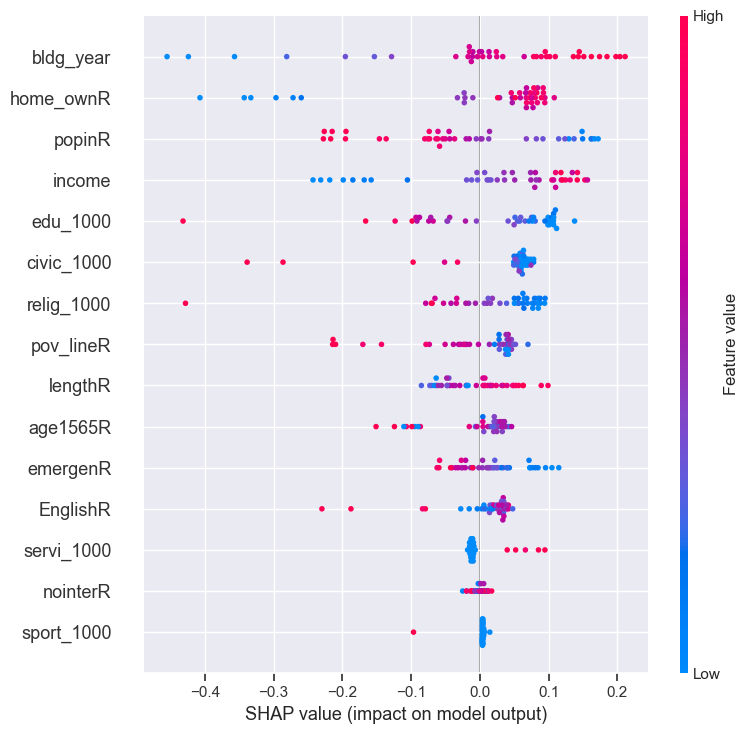

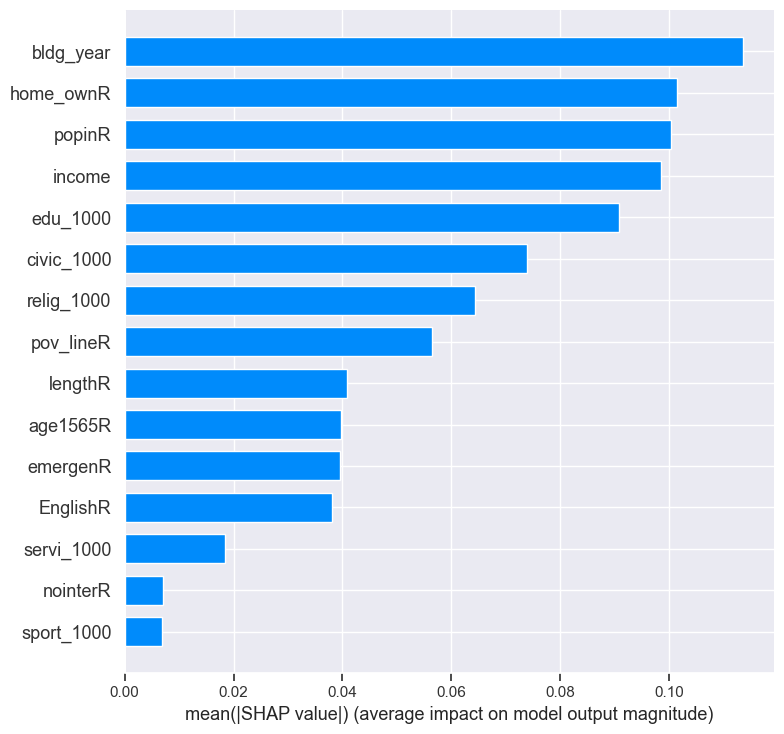

[0.5973]
[0.5004809126260101]
[0.3961939208317931]
[0.3150480625917071]
[0.7153919476226507]
{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


In [25]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

4. Perform backward feature selection again to identify and eliminate irrelevant variables, streamlining the model and improving its efficiency.

In [32]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 20, 
    max_features = "sqrt", 
    n_estimators=100, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['lengthR', 'pov_lineR', 'income', 'home_ownR', 'bldg_year', 'edu_1000',
       'relig_1000', 'servi_1000'],
      dtype='object')


5. Rerun the random forest response model

In [ ]:
y = df['res_mean']
x = df[['lengthR', 'pov_lineR', 'income', 'home_ownR', 'bldg_year', 'edu_1000',
       'relig_1000', 'servi_1000']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_e

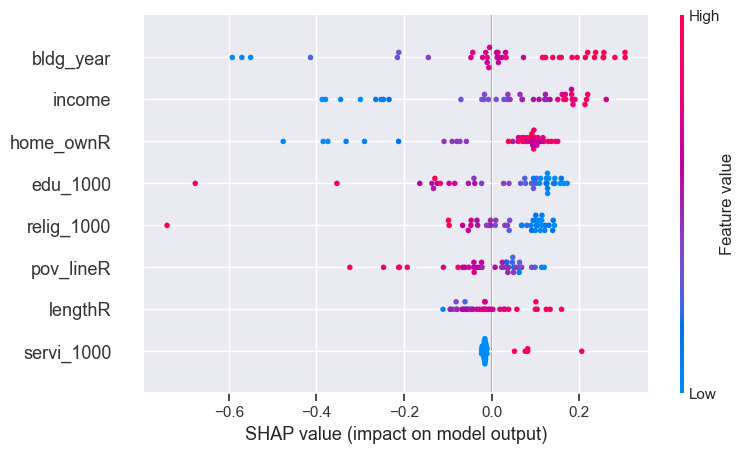

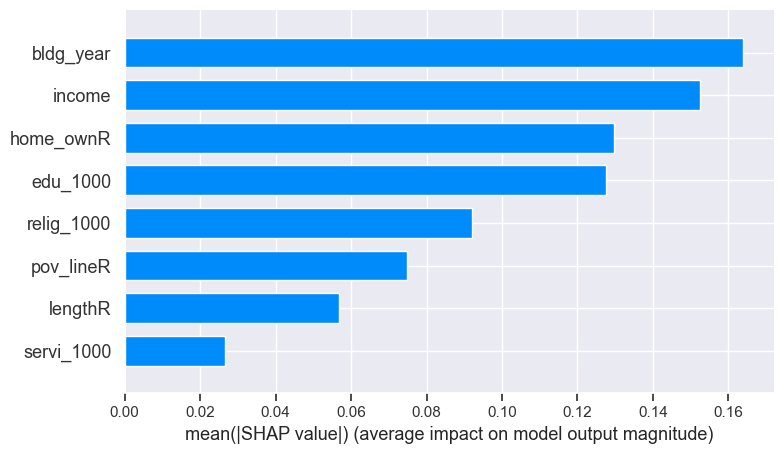

[0.6062]
[0.5508534812462363]
[0.4101791513464347]
[0.3288478642666412]
[0.6949445889960644]
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}


In [38]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)